In [1]:
import pandas as pd
import datetime

def get_historical_data(file_path):
    ''' Load historical stock data from a CSV file. '''
    
    col_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = pd.read_csv(file_path, header=0, names=col_names)

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    stock = pd.DataFrame(df)
    return df


In [2]:
data = get_historical_data("EW-MAX.csv")

In [3]:
import numpy as np
print(data.head())
print("\n")
print("Open    mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("High    mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Low     mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Close   mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Volume  mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


                                   Date      Open      High       Low  \
2000/3/27 1970-01-01 00:00:00.000000003  4.156250  3.812500  4.125000   
2000/3/28 1970-01-01 00:00:00.000000004  4.125000  4.000000  4.015625   
2000/3/29 1970-01-01 00:00:00.000000004  4.031250  3.953125  4.000000   
2000/3/30 1970-01-01 00:00:00.000000004  4.000000  3.843750  3.843750   
2000/3/31 1970-01-01 00:00:00.000000003  3.734375  3.390625  3.390625   

              Close   Volume  
2000/3/27  4.125000  3675600  
2000/3/28  4.015625  1077600  
2000/3/29  4.000000   437200  
2000/3/30  3.843750  1883600  
2000/3/31  3.390625  7931600  


Open    mean : 30.893617887067393   	 Std:  30.20753491915109   	 Max:  121.75   	 Min:  3.390625
---------------------------------------------------------------------------------------------------------------------------------------------
High    mean : 30.23883320810565   	 Std:  29.612389093371565   	 Max:  120.169998   	 Min:  3.0
------------------------------------

In [4]:
data.reset_index(drop=True, inplace=True)
stocks = data.drop(columns=['Date', 'High'])
print(stocks.head())
print("---")
print(stocks.tail())

       Open       Low     Close   Volume
0  4.156250  4.125000  4.125000  3675600
1  4.125000  4.015625  4.015625  1077600
2  4.031250  4.000000  4.000000   437200
3  4.000000  3.843750  3.843750  1883600
4  3.734375  3.390625  3.390625  7931600
---
            Open         Low       Close   Volume
4387  114.099998  113.309998  113.309998   950000
4388  113.529999  111.870003  111.870003  1805200
4389  112.489998  112.230003  112.230003  2136700
4390  112.900002  112.339996  112.339996  1251600
4391  114.790001  113.190002  113.190002  1611700


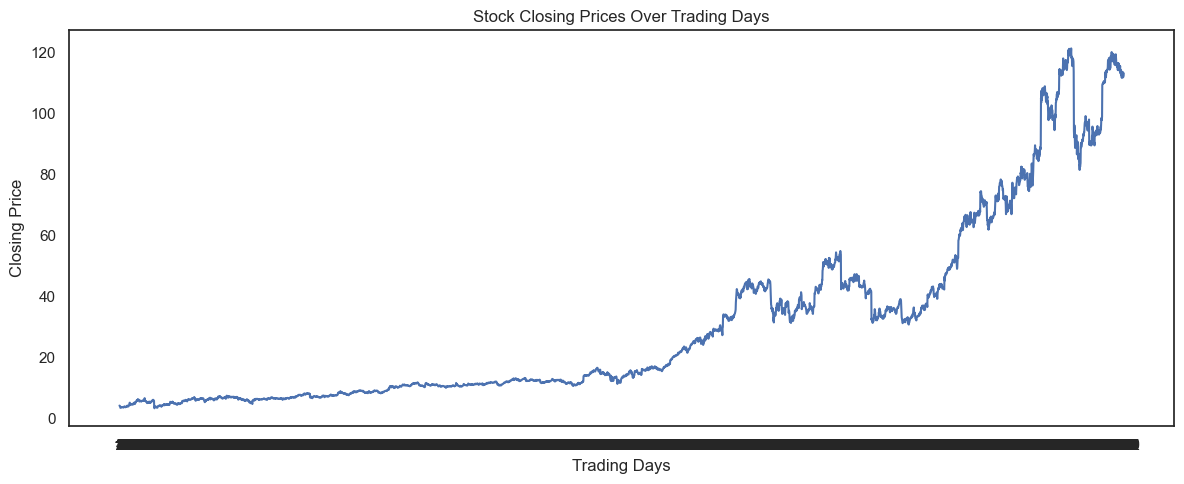

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

stocks['Trading Day'] = range(1, len(stocks) + 1)

sns.set(style="white")

plt.figure(figsize=(12, 5))
sns.lineplot(x='Trading Day', y='Close', data=stocks)

plt.title('Stock Closing Prices Over Trading Days')
plt.xlabel('Trading Days')
plt.ylabel('Closing Price')
plt.xticks(range(1, len(stocks) + 1)) 

plt.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(stocks)

normalized_df = pd.DataFrame(normalized_data, columns=stocks.columns)

print("\nNormalized Data:")
print(normalized_df)
print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))



Normalized Data:
          Open       Low     Close    Volume  Trading Day
0     0.006469  0.007408  0.007408  0.075401     0.000000
1     0.006205  0.006482  0.006482  0.019194     0.000228
2     0.005413  0.006350  0.006350  0.005339     0.000455
3     0.005149  0.005027  0.005027  0.036632     0.000683
4     0.002904  0.001191  0.001191  0.167478     0.000911
...        ...       ...       ...       ...          ...
4387  0.935366  0.931843  0.931843  0.016434     0.999089
4388  0.930550  0.919651  0.919651  0.034936     0.999317
4389  0.921764  0.922699  0.922699  0.042107     0.999545
4390  0.925228  0.923630  0.923630  0.022959     0.999772
4391  0.941196  0.930827  0.930827  0.030749     1.000000

[4392 rows x 5 columns]


Open   --- mean : 30.893617887067393   	 Std:  30.20753491915109   	 Max:  121.75   	 Min:  3.390625
---------------------------------------------------------------------------------------------------------------------------------------------
Close  --- mean 

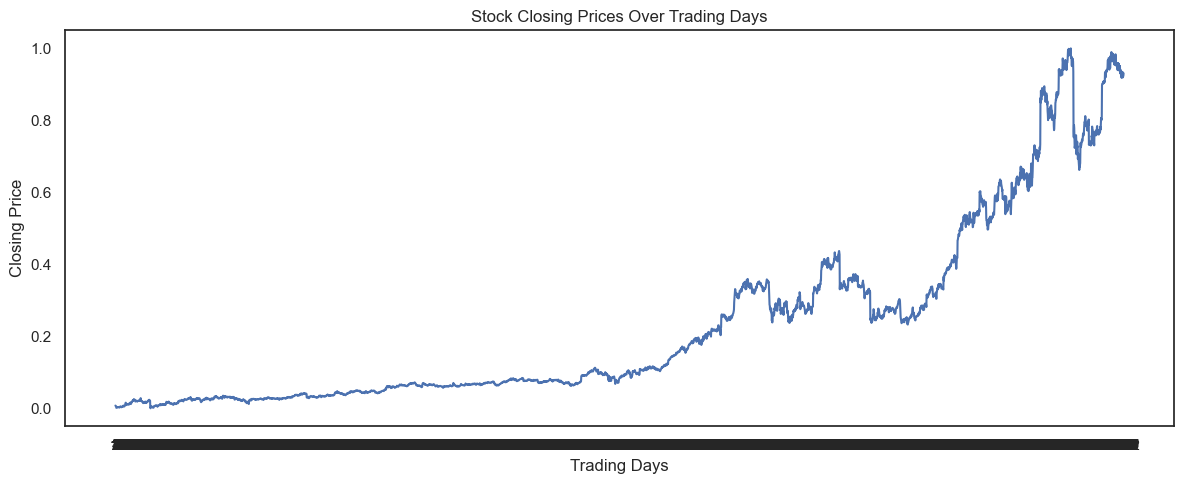

In [7]:
normalized_df['Trading Day'] = range(1, len(normalized_df) + 1)

sns.set(style="white")

plt.figure(figsize=(12, 5))
sns.lineplot(x='Trading Day', y='Close', data=normalized_df)

plt.title('Stock Closing Prices Over Trading Days')
plt.xlabel('Trading Days')
plt.ylabel('Closing Price')
plt.xticks(range(1, len(stocks) + 1)) 

plt.tight_layout()
plt.show()

In [8]:
normalized_df.to_csv('EW_processed.csv', index = False)

In [9]:

import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = stocks = pd.read_csv('EW_processed.csv')
stocks = stocks.rename_axis('Item').reset_index()
display(stocks.head())

,Item,Open,Low,Close,Volume,Trading Day
0,0,0.006469,0.007408,0.007408,0.075401,1
1,1,0.006205,0.006482,0.006482,0.019194,2
2,2,0.005413,0.006350,0.006350,0.005339,3
3,3,0.005149,0.005027,0.005027,0.036632,4
4,4,0.002904,0.001191,0.001191,0.167478,5


In [10]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (3009, 1)
y_train (3009, 1)
x_test (1383, 1)
y_test (1383, 1)


In [11]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [12]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

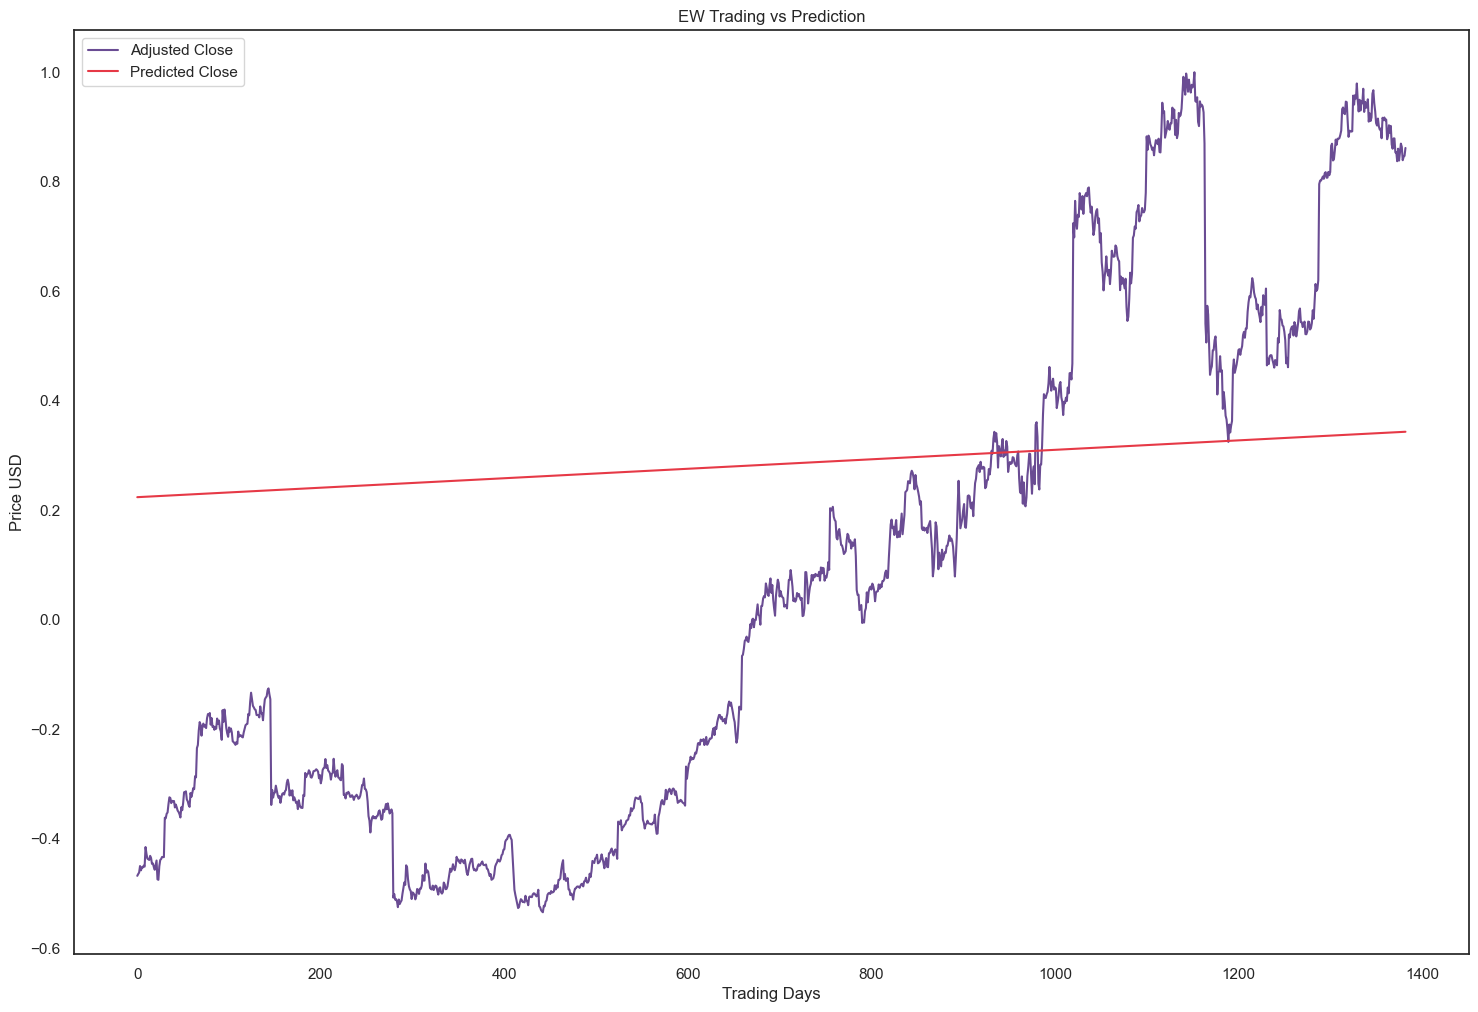

In [13]:
vs.plot_prediction(y_test,predictions)

In [14]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.3173 MSE (0.5633 RMSE)
Test Score: 0.24102296 MSE (0.49094089 RMSE)


In [15]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time 
import visualize as vs
import stock_data as sd
import LinearRegressionModel


stocks = pd.read_csv('EW_processed.csv')

stocks_data = pd.DataFrame(stocks.drop(columns = ['Low', 'Trading Day']))

display(stocks_data.head())

,Open,Close,Volume
0,0.006469,0.007408,0.075401
1,0.006205,0.006482,0.019194
2,0.005413,0.006350,0.005339
3,0.005149,0.005027,0.036632
4,0.002904,0.001191,0.167478


In [16]:
# Assuming stocks_data is your DataFrame and already contains the necessary columns
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, prediction_time=5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]# Assuming stocks_data is your DataFrame
try:
    X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, prediction_time=5)

    unroll_length = 50
    X_train = sd.unroll(X_train, unroll_length)
    X_test = sd.unroll(X_test, unroll_length)

    # Adjust y_train and y_test sizes
    y_train = y_train[-X_train.shape[0]:]
    y_test = y_test[-X_test.shape[0]:]

    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
except Exception as e:
    print("Error:", e)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3836, 50, 3)
y_train shape: (3836,)
X_test shape: (446, 50, 3)
y_test shape: (446,)
X_train shape: (3836, 50, 3)
y_train shape: (3836,)
X_test shape: (446, 50, 3)
y_test shape: (446,)


In [17]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0020151138305664062


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0038 - val_loss: 9.5583e-04


In [19]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


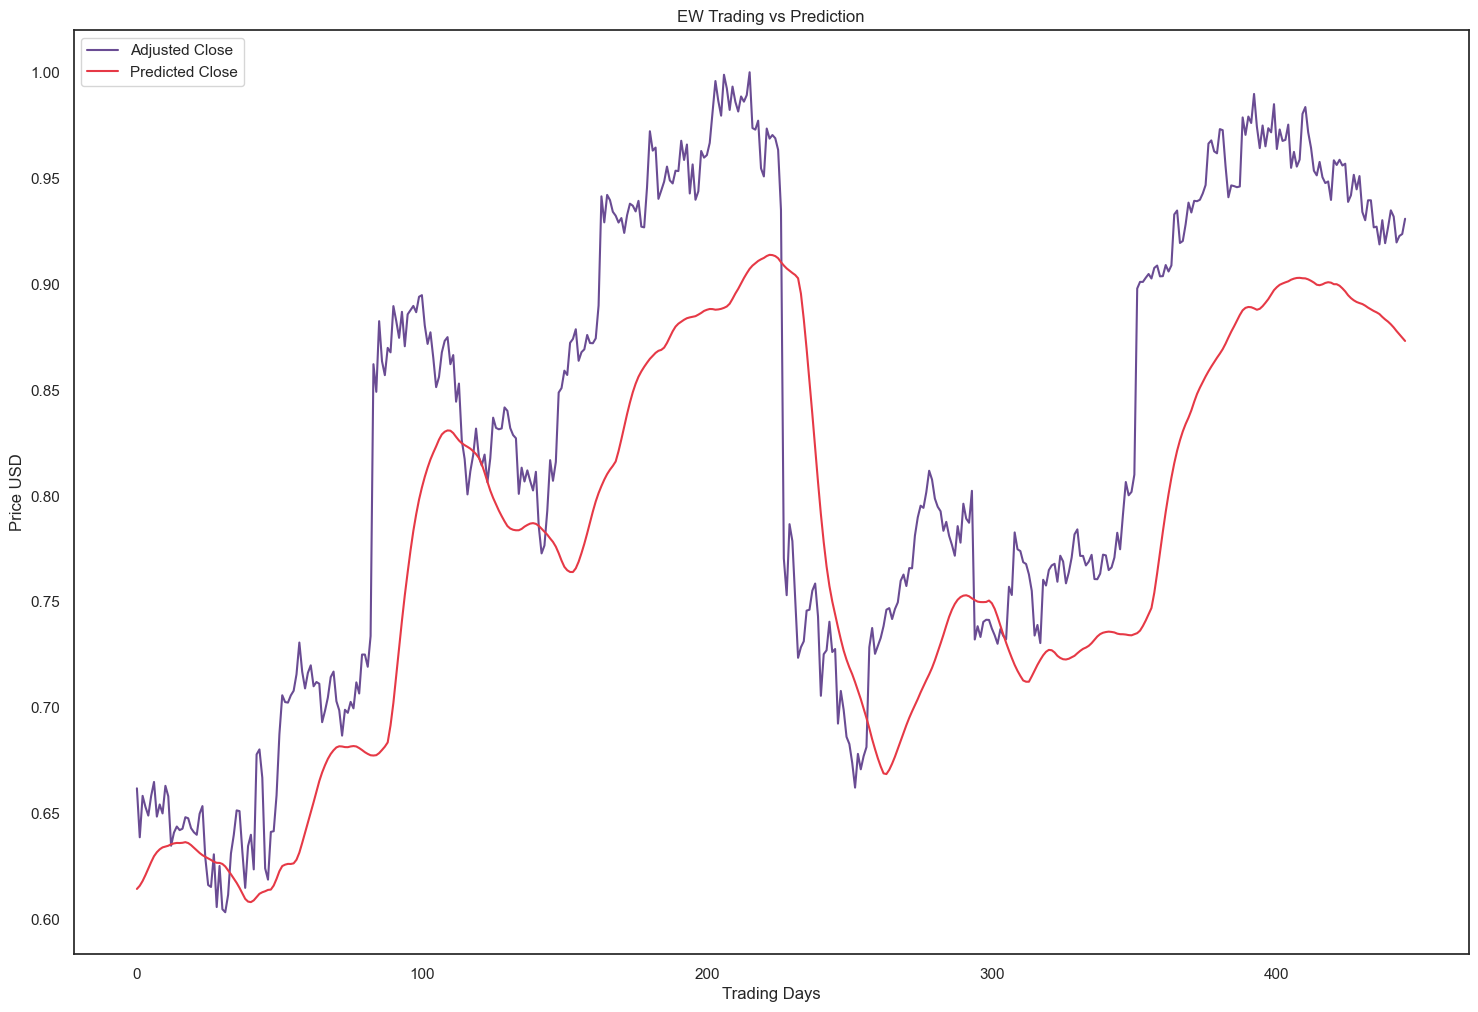

In [20]:
vs.plot_lstm_prediction(y_test,predictions)

In [21]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0009348392486572266


In [22]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
37/37 - 2s - 67ms/step - loss: 0.0025 - val_loss: 7.4555e-04
Epoch 2/5
37/37 - 2s - 43ms/step - loss: 4.3211e-04 - val_loss: 7.6534e-04
Epoch 3/5
37/37 - 2s - 45ms/step - loss: 3.6794e-04 - val_loss: 0.0012
Epoch 4/5
37/37 - 2s - 46ms/step - loss: 3.5397e-04 - val_loss: 7.1649e-04
Epoch 5/5
37/37 - 2s - 46ms/step - loss: 3.1322e-04 - val_loss: 8.3690e-04


In [23]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


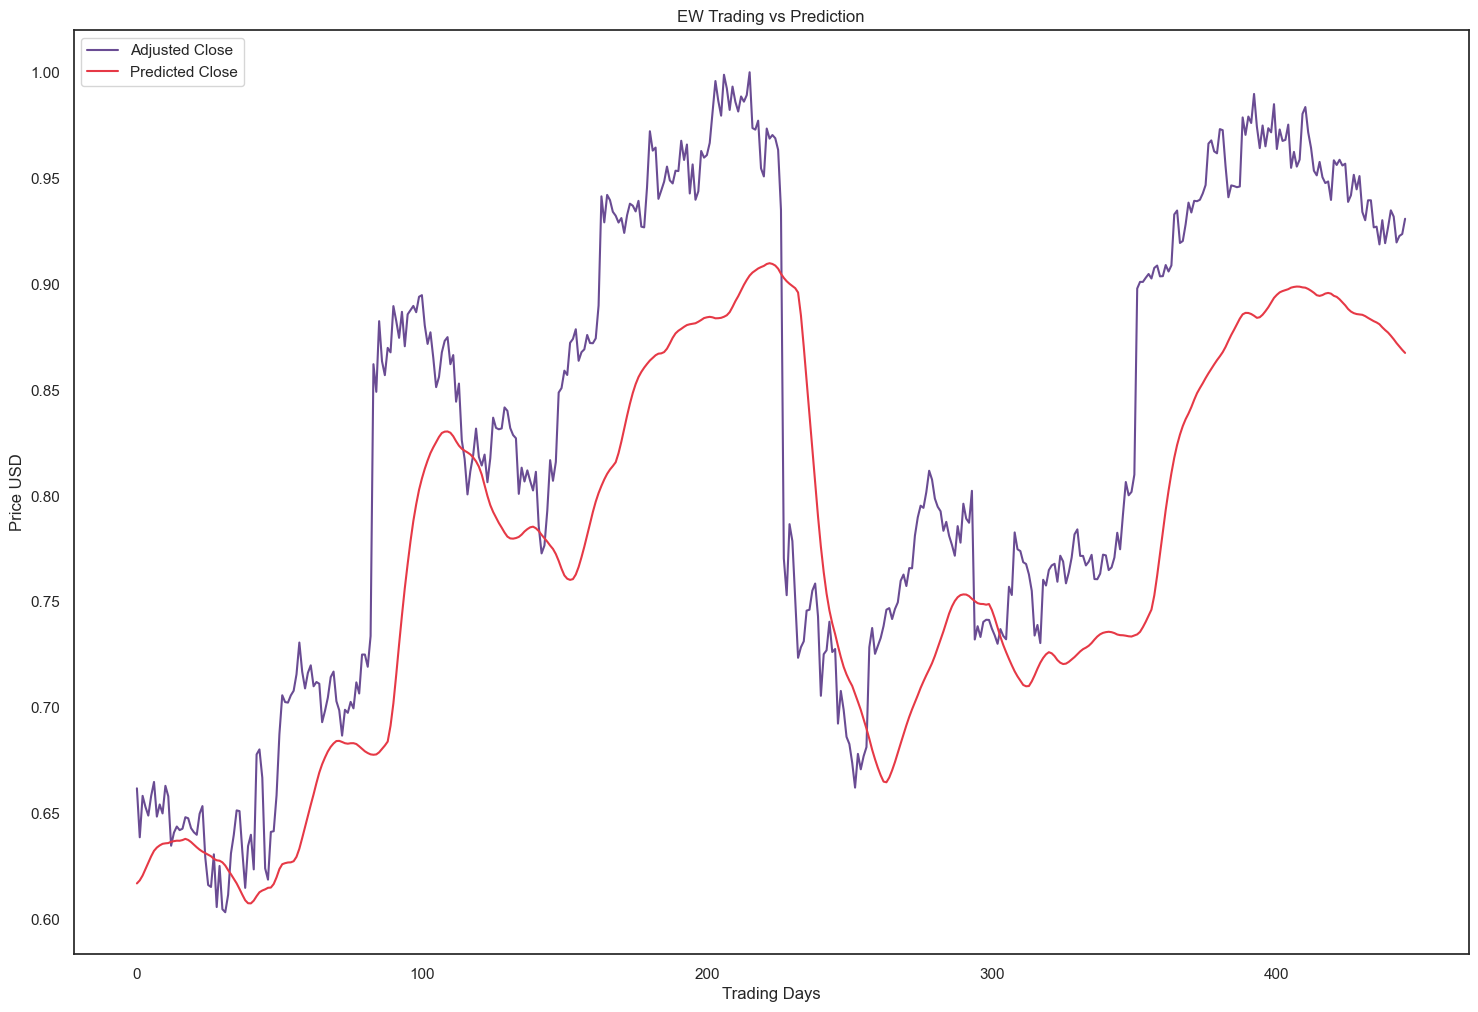

In [24]:
vs.plot_lstm_prediction(y_test,predictions)

In [25]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00021102 MSE (0.01452668 RMSE)
Test Score: 0.00541797 MSE (0.07360688 RMSE)


In [26]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.005418 - RMSE * Adjusted Close Range
